In [1]:
import torchvision.models as models

densenet = models.densenet161(pretrained=True)

In [2]:
images_dir = 'scene_img_abstract_v002_train2015/'
features_dir = 'scene_img_abstract_v002_train2015_features/'
test_image = 'extract_test_image.png'

In [3]:
from torchvision import transforms
from PIL import Image

crop = transforms.Resize(120)
img = Image.open(test_image)

print(type(img))
print(img.size)

croped_img=crop(img)
print(type(croped_img))
print(croped_img.size)

<class 'PIL.PngImagePlugin.PngImageFile'>
(700, 400)
<class 'PIL.Image.Image'>
(210, 120)


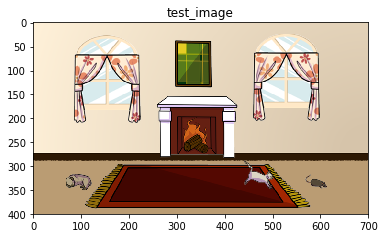

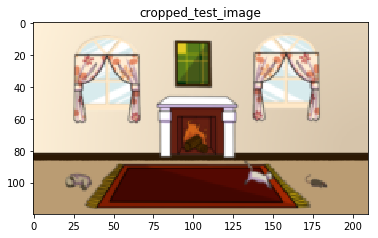

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline 
plt.imshow(img)
plt.axis('on')
plt.title('test_image')
plt.show()

plt.imshow(croped_img)
plt.axis('on')
plt.title('cropped_test_image')
plt.show()

In [5]:
# print(densenet)

In [6]:
import torch.nn as nn

# remove last fully-connected layer
new_classifier = nn.Sequential(*list(densenet.classifier.children())[:-1])
densenet.classifier = new_classifier

print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

In [7]:
import torch

print(img.mode)
transform_rgb = transforms.Lambda(lambda image: image.convert('RGB'))
img_rgb = transform_rgb(img)
print(img_rgb.mode)

transform = transforms.ToTensor()
transform_img = transform(img_rgb)
print(transform_img.size())
print(torch.unsqueeze(transform_img, 0).size())
# print(densenet(transform_img))

RGBA
RGB
torch.Size([3, 400, 700])
torch.Size([1, 3, 400, 700])


In [8]:
print(densenet(torch.unsqueeze(transform_img, 0)))
print(densenet(torch.unsqueeze(transform_img, 0)).size())

tensor([[2.5071e-07, 8.9342e-08, 3.8126e-08,  ..., 8.2831e-01, 7.4797e-01,
         5.0306e-01]], grad_fn=<ViewBackward>)
torch.Size([1, 2208])
